### GROUP 21
- Sai Phani Ram Popuri : **2205577**
- Sandeep Potla : **2151524**
- Sai Suma Podila : **2149229**
- Manivardhan Reddy Pidugu : **2146807**

In [1]:
#!pip install yellowbrick

In [2]:
# Importing necessary libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split, RepeatedStratifiedKFold
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

from sklearn.metrics import silhouette_samples, silhouette_score

import warnings
warnings.filterwarnings('always')

plt.figure(figsize = (8, 5))

%matplotlib inline

In [4]:
# Reading the data set

In [5]:
wine_df = pd.read_csv("wine.csv")

In [6]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [7]:
#Printing the first 5 rows of the dataframe
wine_df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
wine_df.shape

(178, 14)

In [9]:
wine_df.dtypes

Wine                      int64
Alcohol                 float64
Malic.acid              float64
Ash                     float64
Acl                     float64
Mg                        int64
Phenols                 float64
Flavanoids              float64
Nonflavanoid.phenols    float64
Proanth                 float64
Color.int               float64
Hue                     float64
OD                      float64
Proline                   int64
dtype: object

In [10]:
wine_df["Wine"].value_counts()

2    71
1    59
3    48
Name: Wine, dtype: int64

In [11]:
target = wine_df["Wine"]

In [12]:
# Dropping the target or labels
wine_df.drop(columns = ["Wine"], axis = 1, inplace = True)

In [13]:
wine_df.head(2)

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


array([[<AxesSubplot: title={'center': 'Alcohol'}>,
        <AxesSubplot: title={'center': 'Malic.acid'}>,
        <AxesSubplot: title={'center': 'Ash'}>,
        <AxesSubplot: title={'center': 'Acl'}>],
       [<AxesSubplot: title={'center': 'Mg'}>,
        <AxesSubplot: title={'center': 'Phenols'}>,
        <AxesSubplot: title={'center': 'Flavanoids'}>,
        <AxesSubplot: title={'center': 'Nonflavanoid.phenols'}>],
       [<AxesSubplot: title={'center': 'Proanth'}>,
        <AxesSubplot: title={'center': 'Color.int'}>,
        <AxesSubplot: title={'center': 'Hue'}>,
        <AxesSubplot: title={'center': 'OD'}>],
       [<AxesSubplot: title={'center': 'Proline'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

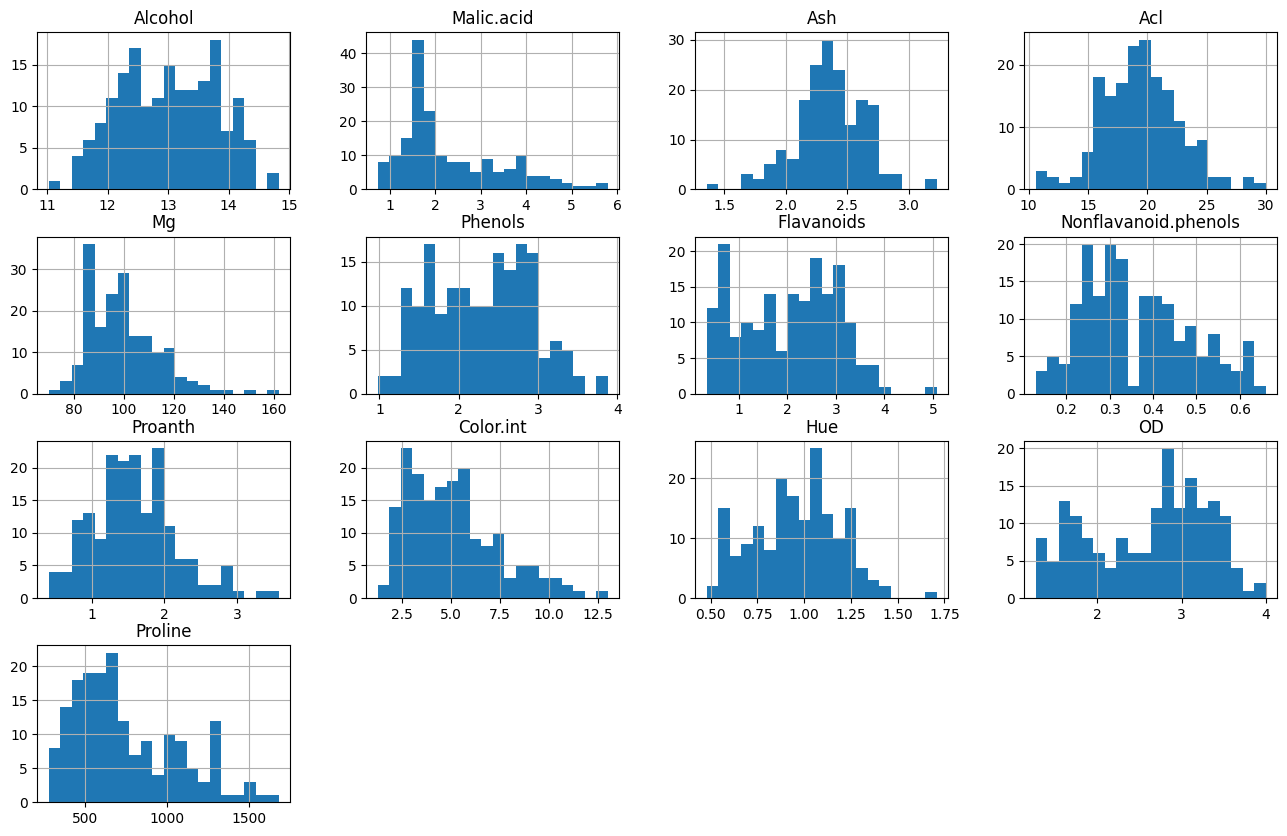

In [14]:
wine_df.hist(bins = 20, figsize=(16, 10))

In [15]:
# Copying the dataframe
data = wine_df.copy()

#### Algorithm for K_means clustering:

1. Scaling the data to standardize values.
2. Initializing the random centroids
3. Get labels for each data point
4. Create new centroids
5. Plot the centroids
6. Repeat 3-5 until the centroids stop changing

### Scaling the data

In [16]:
# Improvement to the Min-Max Scaler 
# We are multiplying by 9 followed by the addition of 1 
# This sets the min and max values in each column to 1 and 10.

data = (data - data.min())/(data.max() - data.min()) * 9 + 1

In [17]:
data.describe()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,5.667253,3.839355,5.844199,5.126520,3.909502,5.081383,4.207474,4.937142,4.352710,3.901264,4.493532,5.423139,4.010014
std,1.922747,1.987019,1.320372,1.549282,1.397199,1.942296,1.896567,2.113359,1.624994,1.780254,1.672475,2.340628,2.021517
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.155921,2.534091,5.090909,4.061856,2.760870,3.366379,2.642405,3.377358,3.384858,2.489761,3.213415,3.200549,2.428317
50%,5.784211,3.000988,5.812834,5.128866,3.739130,5.267241,4.408228,4.566038,4.250789,3.618601,4.548780,5.978022,3.538873
75%,7.270395,5.166502,6.763369,6.056701,4.619565,6.648276,5.813291,6.221698,5.372240,4.778157,5.682927,7.263736,5.538516
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [18]:
# Function to choose random points as centroids
# k = Number of centroids

def random_centroids(data, k):
    centroids = []
    for i in range(k):
        centroid = data.apply(lambda x: float(x.sample()))
        centroids.append(centroid)
    return pd.concat(centroids, axis=1)

In [19]:
centroids = random_centroids(data, 5)

In [20]:
centroids

,0,1,2,3,4
Alcohol,6.992105,7.702632,2.468421,1.000000,2.468421
Malic.acid,2.743083,4.432806,3.063241,2.832016,2.049407
Ash,7.160428,5.524064,8.267380,4.561497,5.427807
Acl,5.824742,4.432990,5.731959,5.360825,5.360825
Mg,4.717391,1.978261,3.152174,1.978261,3.445652
Phenols,4.786207,3.079310,5.437931,7.734483,6.741379
Flavanoids,3.335443,2.234177,4.550633,5.651899,5.879747
Nonflavanoid.phenols,6.094340,6.094340,3.377358,5.584906,5.075472
Proanth,4.548896,2.504732,5.542587,5.429022,6.593060
Color.int,8.095563,2.359215,3.887372,4.202218,1.598976


In [21]:
# Returns the label where the distance is minimum
def get_labels(data, centroids):
    distances = centroids.apply(lambda x: np.sqrt(((data - x) ** 2).sum(axis=1)))
    return distances.idxmin(axis=1)

In [22]:
labels = get_labels(data, centroids)

In [23]:
labels.value_counts()

2    82
1    48
0    32
4    16
dtype: int64

In [24]:
# Update the centroids
def new_centroids(data, labels, k):
    centroids = data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T
    return centroids

In [25]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [26]:
def plot_clusters(data, labels, centroids, iteration):
    # Decomposing the features into Principal Components
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    # Plotting the clusters
    plt.title(f'K-means Clustering Iteration {iteration}', size = 10)
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1], c="Red")
    plt.xlabel("PC 1", size=10)
    plt.ylabel("PC 2", size=10)
    plt.show()

In [27]:
# Finding the Optimal K value based on the Scree Plot

inertia = []
for k in range(2, 10):
    model = KMeans(k)
    model.fit(data)
    inertia.append(model.inertia_)

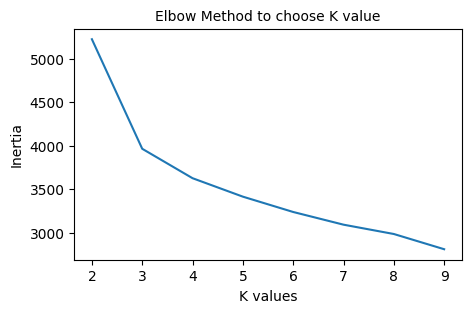

In [28]:
plt.figure(figsize=(5, 3))
plt.plot(np.arange(2, 10), inertia)
plt.title('Elbow Method to choose K value', size=10)
plt.xlabel('K values', size=10)
plt.ylabel('Inertia', size=10)
plt.show()

- From the above line plot, we can consider k = 3 to be the optimal value of clusters required.

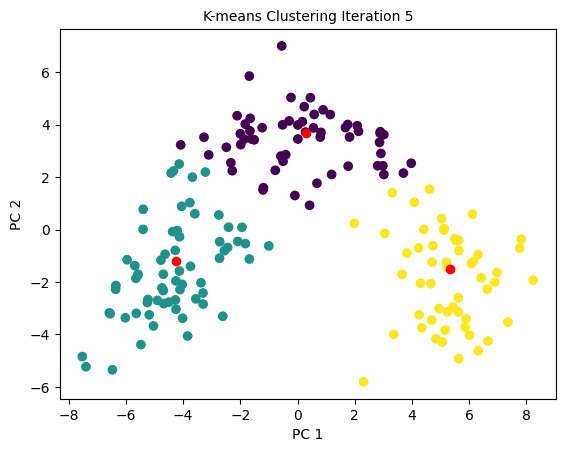

In [29]:
# Setting the iterations to 200
max_iterations = 200
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids
    
    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [30]:
# Centroids from custom implementation
centroids

,0,1,2
Alcohol,3.574818,6.967547,5.825950
Malic.acid,2.783790,2.978368,4.986616
Ash,4.954027,6.115692,5.992752
Acl,5.201212,3.982128,5.784653
Mg,2.996862,4.417213,3.687376
Phenols,4.560158,6.783204,3.005057
Flavanoids,4.046113,5.989704,1.845079
Nonflavanoid.phenols,4.541487,3.451570,6.051843
Proanth,4.147974,5.166562,2.864229
Color.int,2.168246,4.020473,5.131034


In [31]:
print("Silhouette Score for K-means base variant: ", silhouette_score(data, labels))

Silhouette Score for K-means base variant:  0.29773327078689754


### K-Means using Sklearn model 

In [32]:
from sklearn.cluster import KMeans

In [33]:
k_means = KMeans(3)

pca = PCA(n_components=2)

data_2d = pca.fit_transform(data)

k_means.fit(data_2d)

KMeans(n_clusters=3)

In [34]:
## Centroids from Sklearn implementation
pd.DataFrame(k_means.cluster_centers_).T

,0,1,2
0,0.153110,5.377557,-4.365358
1,3.295132,-1.970635,-1.596858


In [35]:
labels = k_means.labels_

Text(0, 0.5, 'Principal Component 2')

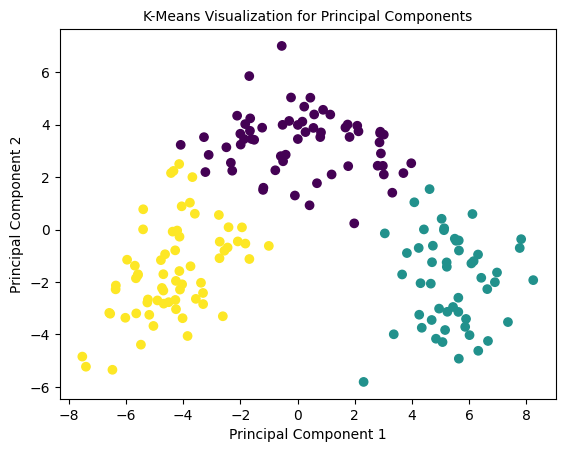

In [36]:
plt.scatter(data_2d[:, 0], data_2d[:, 1], c= labels, cmap='viridis');
plt.title("K-Means Visualization for Principal Components", size=10)
plt.xlabel("Principal Component 1", size=10)
plt.ylabel("Principal Component 2", size=10)

In [37]:
print("Silhouette Score using sklearn: ", silhouette_score(data_2d, labels))

Silhouette Score using sklearn:  0.5680591392935428


In [38]:
# GridSearch Optimization

model = KMeans()

param_grid = {
                  'n_clusters' : range(2, 5),
                  'max_iter': range(100, 500, 100),
                  'algorithm': ["lloyd", "elkan", "auto", "full"]
              }

returned_model = GridSearchCV(KMeans() , param_grid=param_grid, n_jobs=-1, verbose=2, 
                              scoring = "homogeneity_score")

In [39]:
returned_model.fit(data_2d)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/opt/miniconda3/lib/python3.9/site

GridSearchCV(estimator=KMeans(), n_jobs=-1,
             param_grid={'algorithm': ['lloyd', 'elkan', 'auto', 'full'],
                         'max_iter': range(100, 500, 100),
                         'n_clusters': range(2, 5)},
             scoring='homogeneity_score', verbose=2)

In [40]:
returned_model.best_params_

{'algorithm': 'lloyd', 'max_iter': 100, 'n_clusters': 2}

In [41]:
best_params = returned_model.best_params_

In [42]:
model = KMeans(max_iter= best_params['max_iter'], 
               n_clusters= best_params['n_clusters'],
               algorithm=best_params['algorithm'])

In [43]:
model.fit(data_2d)
labels = model.predict(data_2d)

In [44]:
print("Cross Validated score for K_means best params: ", silhouette_score(data_2d, model.labels_))

Cross Validated score for K_means best params:  0.4926692564158774


Text(0, 0.5, 'Principal Component 2')

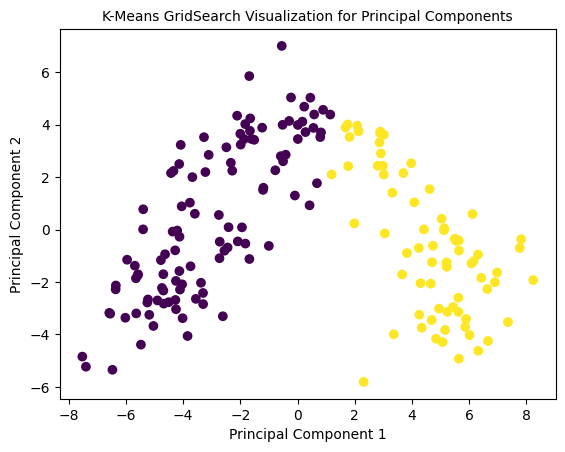

In [45]:
plt.scatter(data_2d[:, 0], data_2d[:, 1], c= labels, cmap='viridis');
plt.title("K-Means GridSearch Visualization for Principal Components", size=10)
plt.xlabel("Principal Component 1", size=10)
plt.ylabel("Principal Component 2", size=10)

/opt/miniconda3/lib/python3.9/site-packages/yellowbrick/style/colors.py:35: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
/opt/miniconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/opt/miniconda3/lib/python3.9/site-packages/yellowbrick/style/rcmod.py:31: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
/opt/miniconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/opt/miniconda3/lib/python3.9/site-packages/yellowbrick/style/colors.py:104: PendingDeprecationWarning: The get_cmap function will be depreca

SilhouetteVisualizer(ax=<AxesSubplot: title={'center': 'Silhouette Visualizer for K-means grid search'}, xlabel='Silhouette co-efficients', ylabel='Cluster count'>,
                     estimator=KMeans(max_iter=100, n_clusters=2))

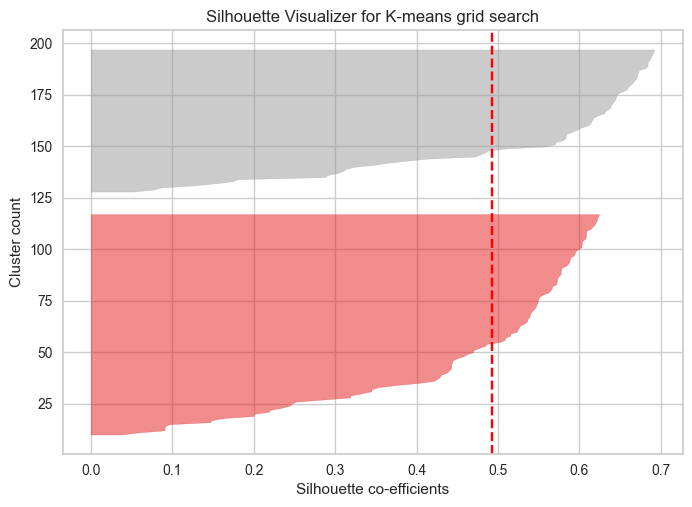

In [46]:
# Library to visualize the Silhouette scores

from yellowbrick.cluster import SilhouetteVisualizer

plt.title('Silhouette Visualizer for K-means grid search')
plt.xlabel('Silhouette co-efficients')
plt.ylabel('Cluster count')

visualizer = SilhouetteVisualizer(model)

data_copy = data_2d

visualizer.fit(data_copy)

### Agglomerative clustering

In [47]:
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics.cluster import contingency_matrix
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import cophenet, linkage, dendrogram
from scipy.spatial.distance import pdist

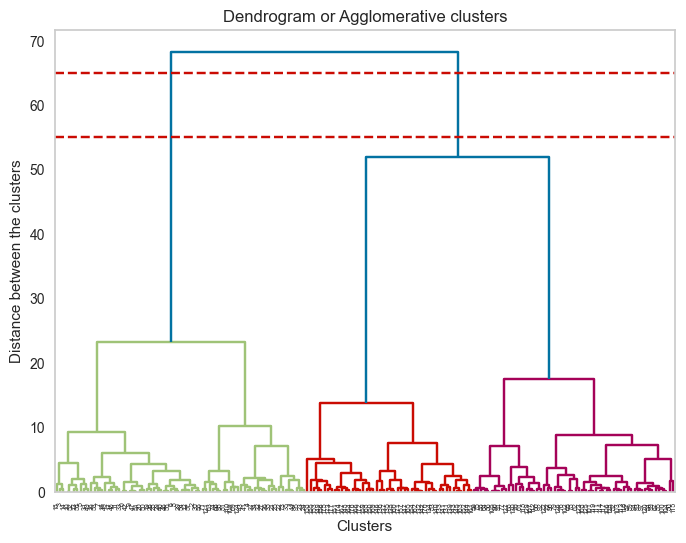

In [48]:
plt.figure(figsize=(8,6))
plt.title('Dendrogram or Agglomerative clusters')
plt.xlabel('Clusters')
plt.ylabel('Distance between the clusters')

# dendrogram(linkage(data, method='single'));
# dendrogram(linkage(data, method='average'));
dendrogram(linkage(data_2d, method='ward'));
plt.axhline(y=55, color='r', linestyle='--')
plt.axhline(y=65, color='r', linestyle='--')
plt.grid();

In [49]:
agg_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agg_cluster.fit_predict(data_2d)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [50]:
silhouette_score(data_2d, agg_cluster.labels_)

0.5433269066195718

Text(0, 0.5, 'Principal Component 2')

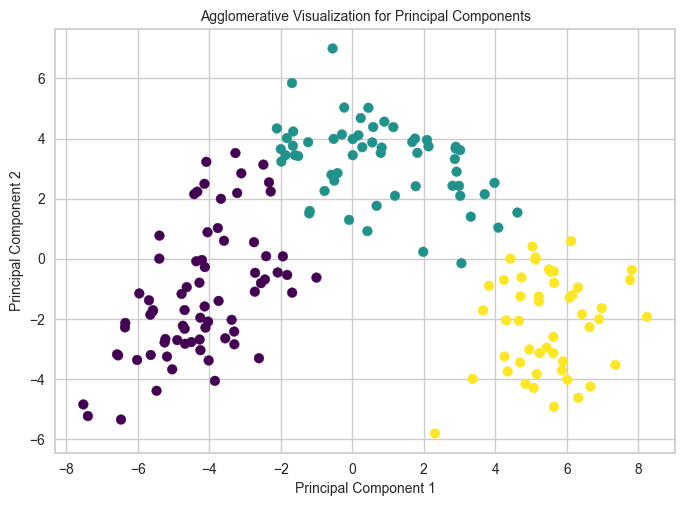

In [51]:
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=agg_cluster.labels_, cmap='viridis');
plt.title("Agglomerative Visualization for Principal Components", size=10)
plt.xlabel("Principal Component 1", size=10)
plt.ylabel("Principal Component 2", size=10)

In [52]:
contingency_matrix(k_means.labels_, agg_cluster.labels_)

array([[ 7, 55,  0],
       [ 0,  3, 48],
       [65,  0,  0]])

In [53]:
cophenet(linkage(data_2d, metric='euclidean', method='ward'), pdist(data_2d))

(0.7631590985806044,
 array([23.19822829,  4.26393729,  9.30315552, ...,  4.4380961 ,
         1.13031023,  4.4380961 ]))

In [54]:
### Agglomerative clustering using GridSearch

param_grid = {
                "n_clusters": range(2, 9),
                "affinity": ["euclidean", "manhattan", 'cosine', 'precomputed'],
                "linkage": ["ward", "complete", "average", "single"]
             }

agg_gridSearch = GridSearchCV(AgglomerativeClustering(), cv=5, param_grid = param_grid, n_jobs = -1, 
                              verbose = 2, scoring='homogeneity_score')

In [55]:
agg_gridSearch.fit(data_2d)

Fitting 5 folds for each of 112 candidates, totalling 560 fits


/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 765, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/opt/miniconda3/lib/python3.9/site

GridSearchCV(cv=5, estimator=AgglomerativeClustering(), n_jobs=-1,
             param_grid={'affinity': ['euclidean', 'manhattan', 'cosine',
                                      'precomputed'],
                         'linkage': ['ward', 'complete', 'average', 'single'],
                         'n_clusters': range(2, 9)},
             scoring='homogeneity_score', verbose=2)

In [56]:
agg_gridSearch.best_params_

{'affinity': 'euclidean', 'linkage': 'ward', 'n_clusters': 2}

In [57]:
agg_model = AgglomerativeClustering(affinity='euclidean',
                                                  linkage = 'ward',
                                                  n_clusters= 2)

print("Silhouette score for Agglomerative clustering: ", 
                                                  silhouette_score(data_2d, agg_model.fit_predict(data_2d)))

Silhouette score for Agglomerative clustering:  0.4634119694403232


### DBSCAN Algorithm

In [58]:
data

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,8.578947,2.725296,6.149733,3.319588,6.576087,6.648276,6.164557,3.547170,6.337539,4.348123,5.097561,9.736264,6.052068
1,6.139474,2.849802,4.754011,1.278351,3.934783,6.182759,5.594937,3.207547,3.470032,3.380546,5.170732,8.021978,5.955777
2,6.044737,3.881423,7.304813,4.711340,4.032609,6.648276,6.506329,3.886792,7.813880,4.378840,5.024390,7.263736,6.822397
3,8.910526,3.152174,6.486631,3.876289,5.206522,9.906897,6.981013,2.867925,6.025237,6.006826,3.780488,8.186813,8.716120
4,6.234211,4.290514,8.267380,5.824742,5.695652,6.648276,5.462025,5.415094,5.003155,3.334471,5.097561,6.472527,3.933666
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,7.347368,9.733202,6.245989,5.592784,3.445652,3.172414,1.512658,7.622642,2.845426,5.930034,2.170732,2.549451,3.965763
174,6.613158,6.638340,6.390374,6.752577,4.130435,3.544828,1.778481,6.094340,3.839117,5.622867,2.609756,1.956044,4.029957
175,6.305263,7.296443,5.331551,5.360825,5.891304,2.893103,1.664557,6.094340,3.668770,7.849829,1.804878,1.956044,4.575606
176,6.068421,4.290514,5.860963,5.360825,5.891304,3.079310,1.645570,7.792453,3.981073,7.158703,1.878049,2.153846,4.607703


In [59]:
dbscan = DBSCAN(eps= 0.97, min_samples=5)
dbscan.fit(data_2d)

DBSCAN(eps=0.97)

In [60]:
labels = dbscan.labels_

Text(0, 0.5, 'Principal Component 2')

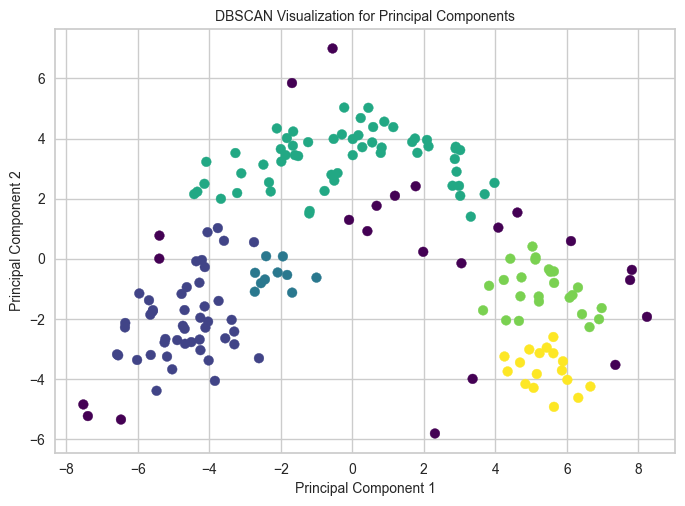

In [61]:
plt.scatter(data_2d[:, 0], data_2d[:, 1], c = labels, cmap = 'viridis')
plt.title("DBSCAN Visualization for Principal Components", size=10)
plt.xlabel("Principal Component 1", size=10)
plt.ylabel("Principal Component 2", size=10)

In [62]:
contingency_matrix(target, labels)

array([[ 4, 45, 10,  0,  0,  0],
       [11,  1,  0, 58,  1,  0],
       [ 8,  0,  0,  0, 23, 17]])

In [63]:
silhouette_score(data_2d, labels)

0.2568058828186641

### Final Remarks:

    - The data has been clustered using the following algorithms:
        
        1. K-Means clustering
        2. Agglomerative Clustering
        3. DBSCAN Clustering
    
        The results are tabulated as below:
    
                    | Model in Use                               |   Silhouette Score |
                    | ------------------------------------------ |--------------------|
                    | K-Means Clustering Base variant            |              0.296 |
                    | K-Means Clustering + Grid Search Avg       |              0.568 |
                    | Agglomerative Clustering + Base Variant    |              0.543 |
                    | Agglomerative Clustering + Grid Search Avg |              0.467 |
                    | DBSCAN Algorithm                           |              0.257 |
    
    
    - Of all the models, the K-means and Agglomerative clustering techniques performed the best with Silhouette score close to 0.55 with a cluster size of 2. 
    - As we know, the DBSCAN works based on the density estimation, the principal components are not densely distributed resulting in the performance below the threshold.